In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("assets/data/fan_audio_dataset.csv", header= None)
dataset.head()

,0,1,2,3,4,5
0,-348.44717,108.70171,-14.359937,16.635178,-7.918430,fan_abnormal
1,-379.85380,144.48773,4.612153,7.896369,-3.054631,fan_abnormal
2,-348.60130,109.20175,-12.103954,19.581463,-6.493403,fan_abnormal
3,-384.54517,150.82423,0.334747,18.628782,-6.153275,fan_abnormal
4,-360.97440,128.88104,9.564446,16.023340,-1.010473,fan_abnormal


In [3]:
dataset.columns= ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','class']

In [4]:
dataset['class'].value_counts()

fan_normal      4075
fan_abnormal    1475
Name: class, dtype: int64

In [5]:
data_matrics = dataset.drop('class', axis = 1)
data_matrics.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5
0,-348.44717,108.70171,-14.359937,16.635178,-7.918430
1,-379.85380,144.48773,4.612153,7.896369,-3.054631
2,-348.60130,109.20175,-12.103954,19.581463,-6.493403
3,-384.54517,150.82423,0.334747,18.628782,-6.153275
4,-360.97440,128.88104,9.564446,16.023340,-1.010473


In [6]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

In [7]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
# data_matrics = data_matrics.join(cluster_labels.to_frame())
# data_matrics.tail()

In [8]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())

In [9]:
cluster_labels.value_counts()

1    3748
0    1802
Name: cluster, dtype: int64

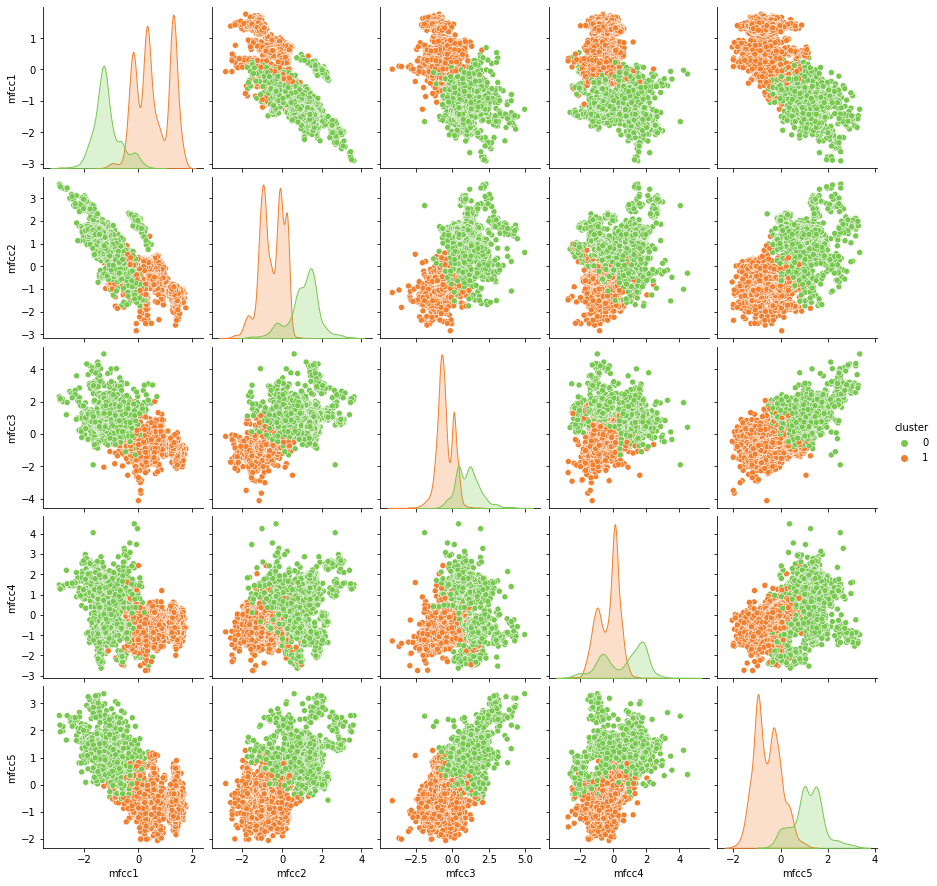

In [10]:
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030'])

In [11]:
from sklearn.cluster import SpectralClustering


In [12]:
SpecCluster= SpectralClustering(n_clusters=2, assign_labels='discretize')
SpecCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(SpecCluster.labels_, name='cluster')

In [13]:
cluster_labels.value_counts()

0    3831
1    1719
Name: cluster, dtype: int64

In [14]:
data_matrics_spec = data_matrics_normalized.join(cluster_labels.to_frame())

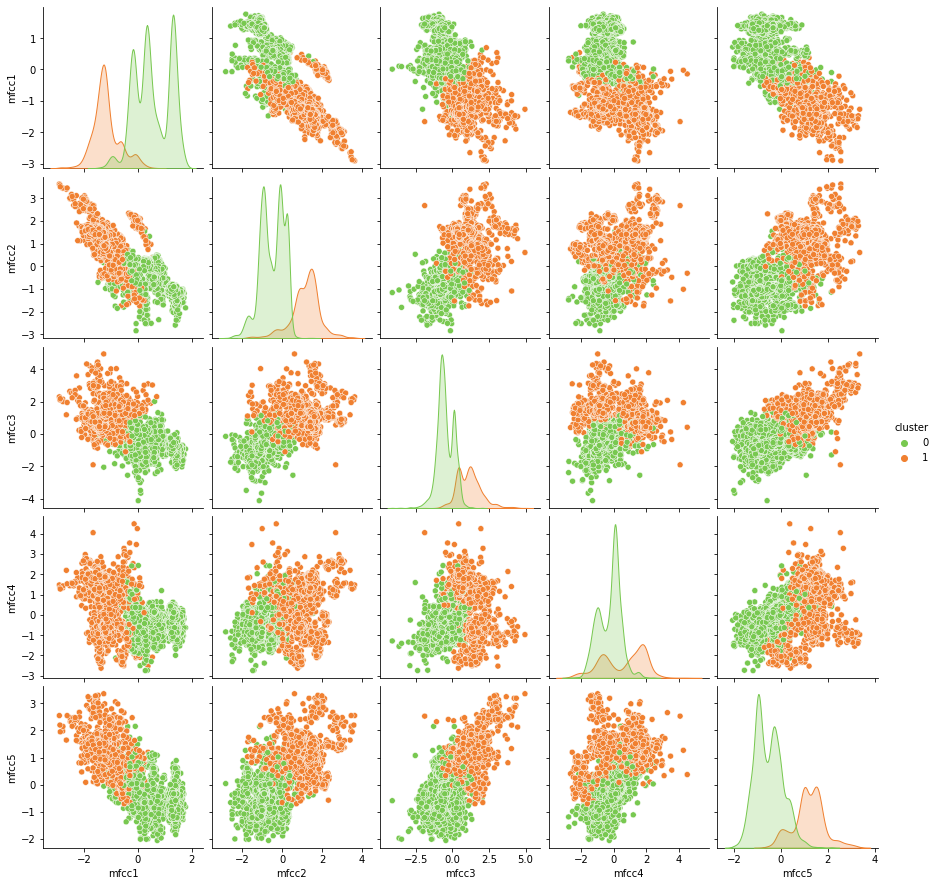

In [16]:
sns.pairplot(data_matrics_spec, hue = 'cluster', palette=['#78C850', '#F08030'])

In [24]:
from sklearn.cluster import AgglomerativeClustering

AggCluster= AgglomerativeClustering(n_clusters=2)
AggCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
data_metrics_AggCluster = data_matrics_normalized.join(cluster_labels.to_frame())

In [25]:
cluster_labels.value_counts()

1    3850
0    1700
Name: cluster, dtype: int64

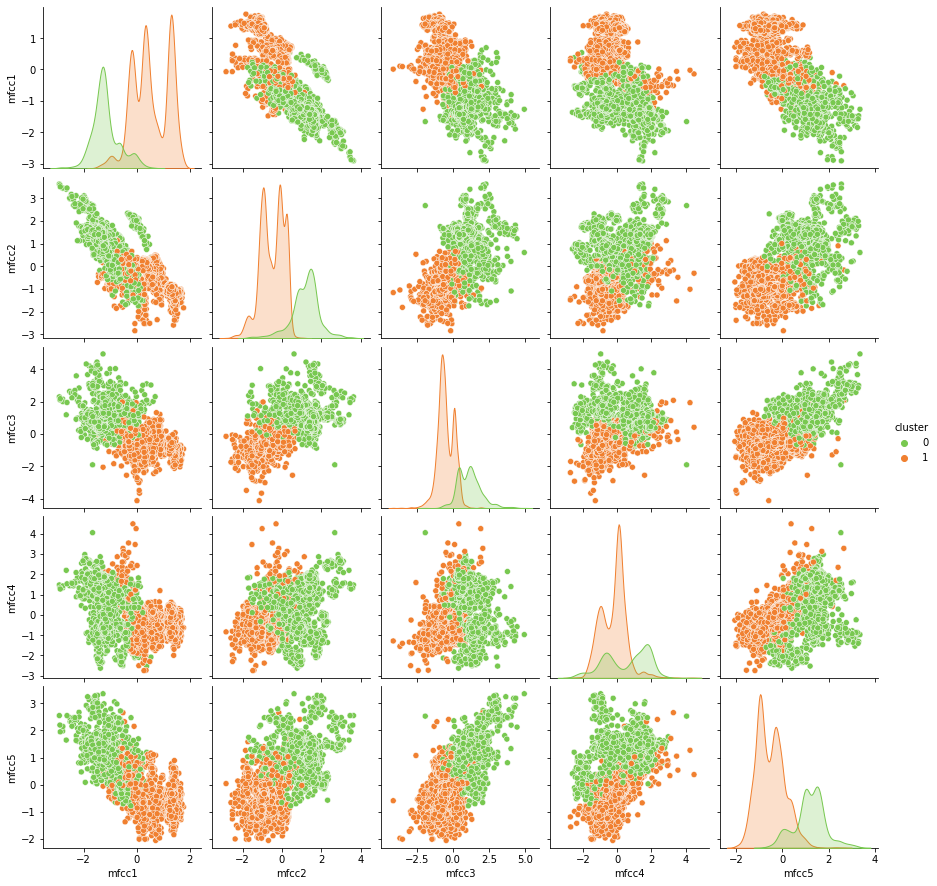

In [18]:
sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030'])

<AxesSubplot:title={'center':'Agglomerative Clustering'}, xlabel='mfcc1', ylabel='mfcc5'>

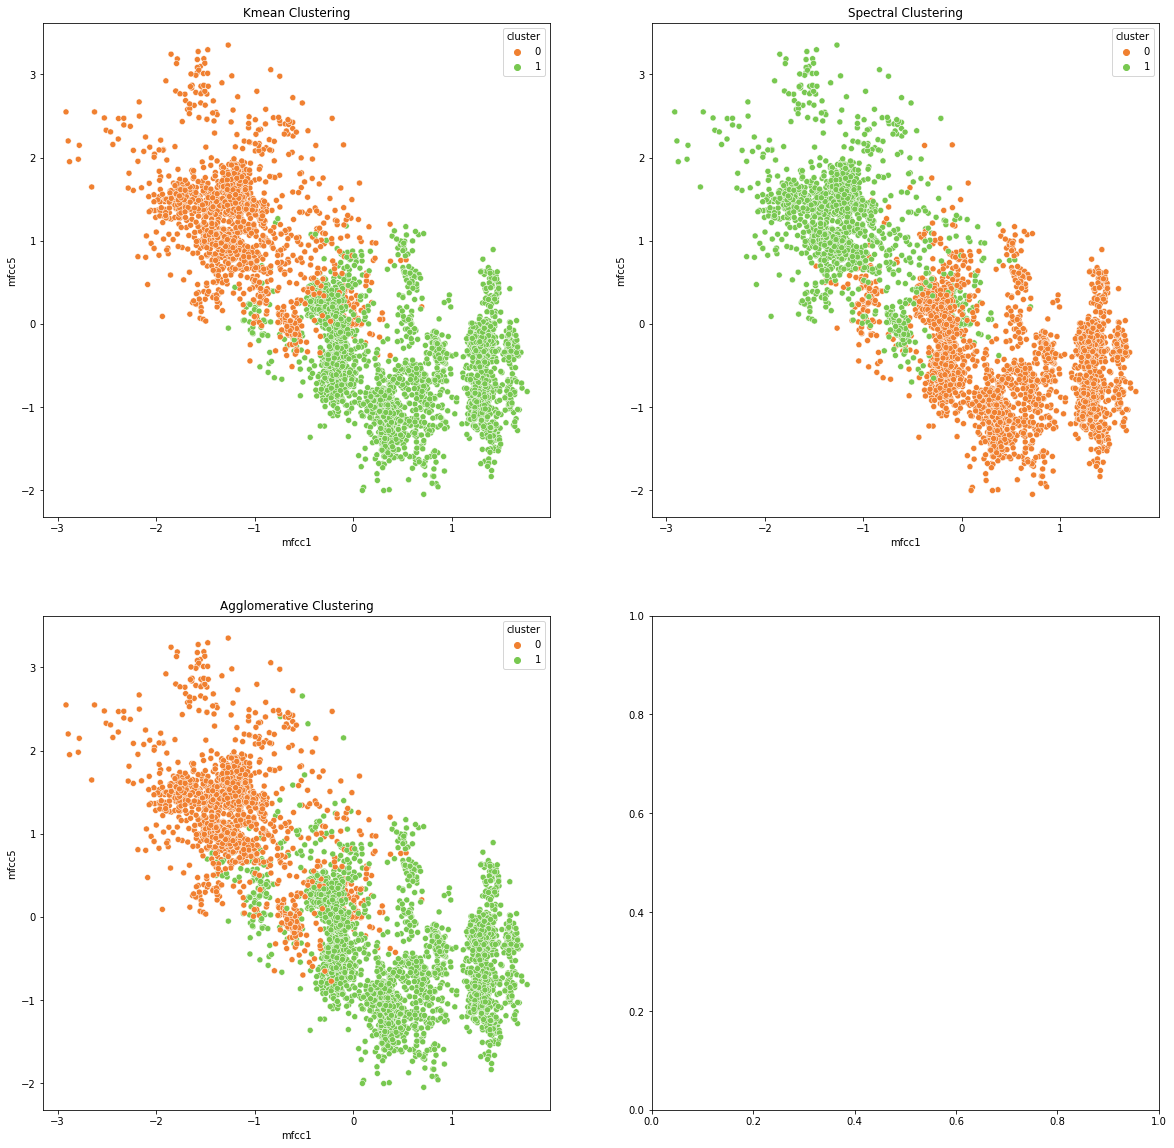

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes[0,0].title.set_text("Kmean Clustering")
axes[0,1].title.set_text("Spectral Clustering")
axes[1,0].title.set_text("Agglomerative Clustering")
# axes[1,1].title.set_text("Agglomerative Clustering")
sns.scatterplot(ax= axes[0,0], data=data_matrics_kmean, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[0,1], data=data_matrics_spec, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])
# sns.scatterplot(ax= axes[1,0], data=data_metrics_AffProp, x="mfcc1", y="mfcc2",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[1,0], data=data_metrics_AggCluster, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])

In [20]:
iner=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(data_matrics_normalized)
    iner.append(kmeans.inertia_)
    cluster_labels = pd.Series(kmeans.labels_, name='cluster')

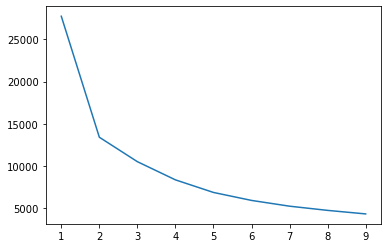

In [21]:
plt.plot(range(1,10), iner)
plt.show()

In [22]:
# iner=[]
# for k in range(1,10):
#     AggCluster= AgglomerativeClustering(n_clusters=k)
#     AggCluster.fit(data_matrics_normalized)
#     iner.append(AggCluster.distances_)
#     cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
# plt.plot(range(1,10), iner)
# plt.show()